<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/HZZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Higgs discovery paper (CMS) https://arxiv.org/pdf/1207.7235

In [1]:
!pip install uproot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.4/827.4 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 635.3/635.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.3 MB/s eta 0:00:00


In [2]:
import uproot

# We will load ROOT datasets in python using uproot

In [3]:
%%bash
mkdir -p data
wget -O data/ntuple_4mu_bkg.root "https://zenodo.org/record/3901869/files/ntuple_4mu_bkg.root?download=1"
wget -O data/ntuple_4mu_VV.root "https://zenodo.org/record/3901869/files/ntuple_4mu_VV.root?download=1"

--2024-09-09 06:33:00--  https://zenodo.org/record/3901869/files/ntuple_4mu_bkg.root?download=1
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.185.79.172, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/3901869/files/ntuple_4mu_bkg.root [following]
--2024-09-09 06:33:01--  https://zenodo.org/records/3901869/files/ntuple_4mu_bkg.root
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 8867265 (8.5M) [application/octet-stream]
Saving to: ‘data/ntuple_4mu_bkg.root’

     0K .......... .......... .......... .......... ..........  0%  188K 46s
    50K .......... .......... .......... .......... ..........  1% 69.0M 23s
   100K .......... .......... .......... .......... ..........  1%  421K 22s
   150K .......... .......... .......... .......... ..........  2%  189M 16s
   200K .......... .......... .......

In [4]:
import numpy as np
import h5py

treename = "HZZ4LeptonsAnalysisReduced"
filename = {}
upfile = {}

filename["bkg"] = "data/ntuple_4mu_bkg.root"
filename["VV"] = "data/ntuple_4mu_VV.root"

upfile["bkg"] = uproot.open(filename["bkg"])
upfile["VV"] = uproot.open(filename["VV"])

print(upfile["bkg"][treename].show())

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
f_run                | int32_t                  | AsDtype('>i4')
f_lumi               | int32_t                  | AsDtype('>i4')
f_event              | int32_t                  | AsDtype('>i4')
f_weight             | float                    | AsDtype('>f4')
f_int_weight         | float                    | AsDtype('>f4')
f_pu_weight          | float                    | AsDtype('>f4')
f_eff_weight         | float                    | AsDtype('>f4')
f_lept1_pt           | float                    | AsDtype('>f4')
f_lept1_eta          | float                    | AsDtype('>f4')
f_lept1_phi          | float                    | AsDtype('>f4')
f_lept1_charge       | float                    | AsDtype('>f4')
f_lept1_pfx          | float                    | AsDtype('>f4')
f_lept1_sip          | float                    | AsDtype(

In [5]:
import pandas as pd

VARS = ["f_mass4l", "f_massjj"]  # choose which vars to use (2d)

df = {}
df["bkg"] = upfile["bkg"][treename].arrays(VARS, library="pd")
df["VV"] = upfile["VV"][treename].arrays(VARS, library="pd")

# print first entry
print(df["bkg"].iloc[:1])

    f_mass4l  f_massjj
0  91.098129    -999.0


In [6]:
# print shape of DataFrame
print(df["bkg"].shape)

(58107, 2)


In [7]:
# convert back into unstructured NumPY array
print(df["VV"].values)
print(df["VV"].values.shape)


[[ 125.0771  1300.4269 ]
 [ 124.23811  437.22186]
 [ 124.38476 -999.     ]
 ...
 [ 121.60812 -999.     ]
 [ 124.46585  773.50116]
 [ 124.40998  768.28595]]
(25817, 2)


In [8]:
# get boolean mask array
#mask = df["bkg"]["f_mass4l"] > 125
#print(mask)


In [9]:
# cut using this boolean mask array
#print(df["bkg"]["f_mass4l"][mask])

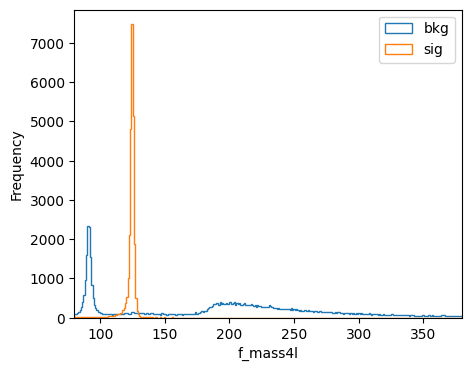

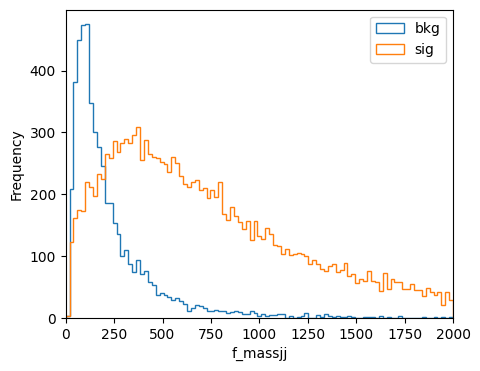

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

#VARS = ["f_mass4l", "f_massjj"]

plt.figure(figsize=(5, 4), dpi=100)
bins = np.linspace(80, 380, 300)
df["bkg"][VARS[0]].plot.hist(bins=bins, alpha=1, label="bkg", histtype="step")
df["VV"][VARS[0]].plot.hist(bins=bins, alpha=1, label="sig", histtype="step")
plt.legend(loc="upper right")
plt.xlim(80, 380)
plt.xlabel(VARS[0])
plt.show()

plt.figure(figsize=(5, 4), dpi=100)
bins = np.linspace(0, 2000, 100)
df["bkg"][VARS[1]].plot.hist(bins=bins, alpha=1, label="bkg", histtype="step")
df["VV"][VARS[1]].plot.hist(bins=bins, alpha=1, label="sig", histtype="step")
plt.legend(loc="upper right")
plt.xlim(0, 2000)
plt.xlabel(VARS[1])
plt.show()

In [11]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [12]:
# cut out undefined variables VARS[0] and VARS[1] > -999
df["VV"] = df["VV"][(df["VV"][VARS[0]] > -999) & (df["VV"][VARS[1]] > -999)]
df["bkg"] = df["bkg"][(df["bkg"][VARS[0]] > -999) & (df["bkg"][VARS[1]] > -999)]

# add isSignal variable
df["VV"]["isSignal"] = np.ones(len(df["VV"]))
df["bkg"]["isSignal"] = np.zeros(len(df["bkg"]))

In [13]:
# baseline keras model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import (
    Input,
    Activation,
    Dense,
    #Convolution2D,
    #MaxPooling2D,
    Dropout,
    #Flatten,
)

NDIM = len(VARS)
inputs = Input(shape=(NDIM,), name="input")
outputs = Dense(1, name="output", kernel_initializer="normal", activation="sigmoid")(inputs)

# create the model
model = Model(inputs=inputs, outputs=outputs)
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
df_all = pd.concat([df["VV"], df["bkg"]])
dataset = df_all.values
X = dataset[:, 0:NDIM]
Y = dataset[:, NDIM]

from sklearn.model_selection import train_test_split

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# preprocessing: standard scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_val)
X_train_val = scaler.transform(X_train_val)
X_test = scaler.transform(X_test)

# early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=10)

# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    "dense_model.keras",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
)

In [15]:
# Train classifier
history = model.fit(
    X_train_val,
    Y_train_val,
    epochs=100,
    batch_size=1024,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint],
    validation_split=0.30,
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.3502 - loss: 0.7062 - val_accuracy: 0.4794 - val_loss: 0.6996
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5170 - loss: 0.6977 - val_accuracy: 0.6532 - val_loss: 0.6913
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6951 - loss: 0.6893 - val_accuracy: 0.7617 - val_loss: 0.6832
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7644 - loss: 0.6814 - val_accuracy: 0.7920 - val_loss: 0.6752
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7999 - loss: 0.6733 - val_accuracy: 0.8198 - val_loss: 0.6674
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8249 - loss: 0.6656 - val_accuracy: 0.8403 - val_loss: 0.6599
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8489 - loss: 0.6578 - val_accuracy: 0.8569 - val_loss: 0.6524
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8557 - loss: 0.6510 - val_accuracy: 0

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


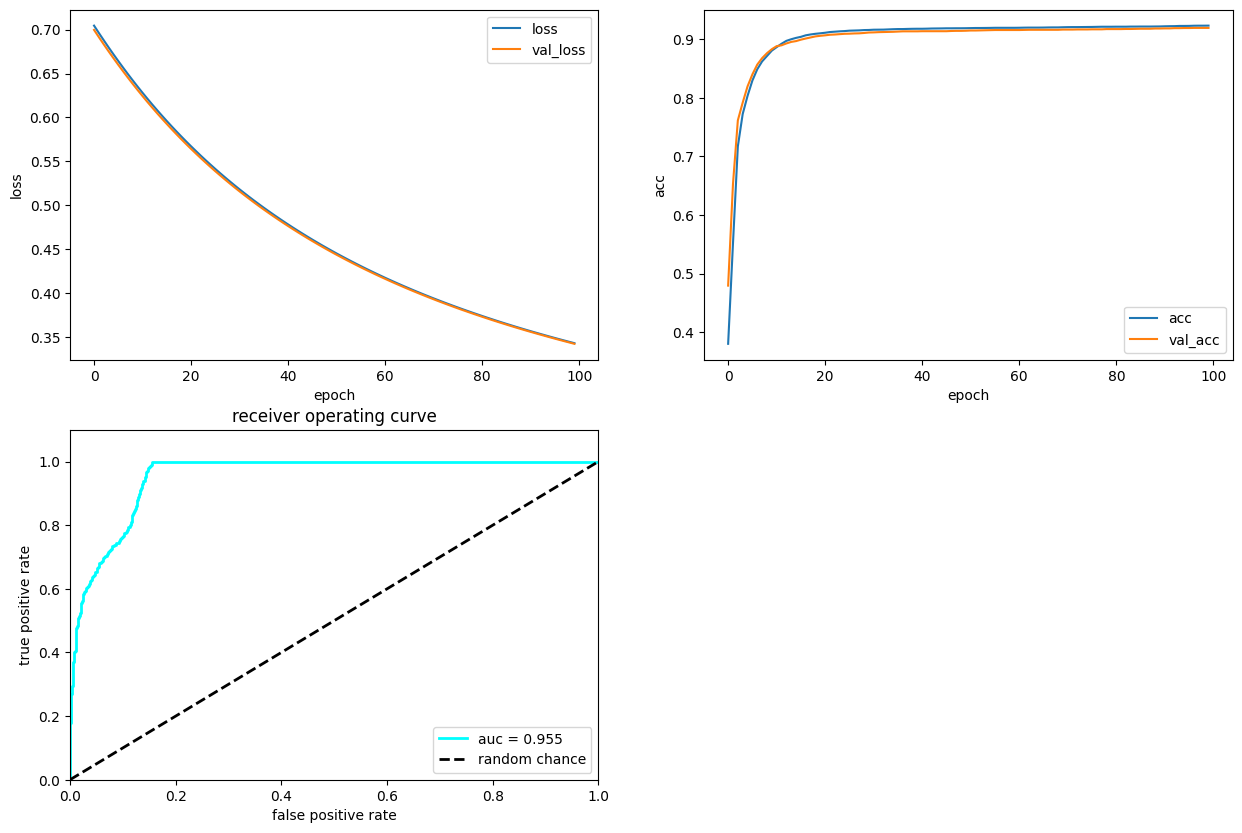

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline
# plot loss vs epoch
plt.figure(figsize=(15, 10))
ax = plt.subplot(2, 2, 1)
ax.plot(history.history["loss"], label="loss")
ax.plot(history.history["val_loss"], label="val_loss")
ax.legend(loc="upper right")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 2)
ax.plot(history.history["accuracy"], label="acc")
ax.plot(history.history["val_accuracy"], label="val_acc")
ax.legend(loc="lower right")
ax.set_xlabel("epoch")
ax.set_ylabel("acc")

# Plot ROC
Y_predict = model.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
roc_auc = auc(fpr, tpr)
ax = plt.subplot(2, 2, 3)
ax.plot(fpr, tpr, lw=2, color="cyan", label="auc = %.3f" % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="k", label="random chance")
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.1])
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title("receiver operating curve")
ax.legend(loc="lower right")
plt.show()

In [17]:
df_all["dense"] = model.predict(X)  # add prediction to array
print(df_all.iloc[:20])

649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
      f_mass4l     f_massjj  isSignal         dense
0   125.077103  1300.426880       1.0  1.000000e+00
1   124.238113   437.221863       1.0  1.000000e+00
3   124.480667  1021.744080       1.0  1.000000e+00
4   124.919464  1101.381958       1.0  1.000000e+00
7   125.049065   498.717194       1.0  1.000000e+00
8   124.130005   481.052643       1.0  1.000000e+00
10  121.229126   689.339294       1.0  1.000000e+00
11  125.027206  2405.221191       1.0  1.000000e+00
13  122.473053   530.915222       1.0  1.000000e+00
14  123.048691  5575.506836       1.0  1.000000e+00
15  124.495239   239.260925       1.0  1.000000e+00
21  124.740082  2092.268311       1.0  1.000000e+00
23  124.471817   970.399841       1.0  1.000000e+00
24  119.681374   234.038818       1.0  1.000000e+00
27  126.484306   127.600357       1.0  3.245496e-09
31  125.878250   745.095764       1.0  1.000000e+00
32  123.532280   626.617432       1.0  1.000000e+00
35  125.434090   646.00

In [18]:
# make a regular 2D grid for the inputs
myXI, myYI = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))
# print shape
print(myXI.shape)

# run prediction at each point
myZI = model.predict(np.c_[myXI.ravel(), myYI.ravel()])
myZI = myZI.reshape(myXI.shape)

(200, 200)
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


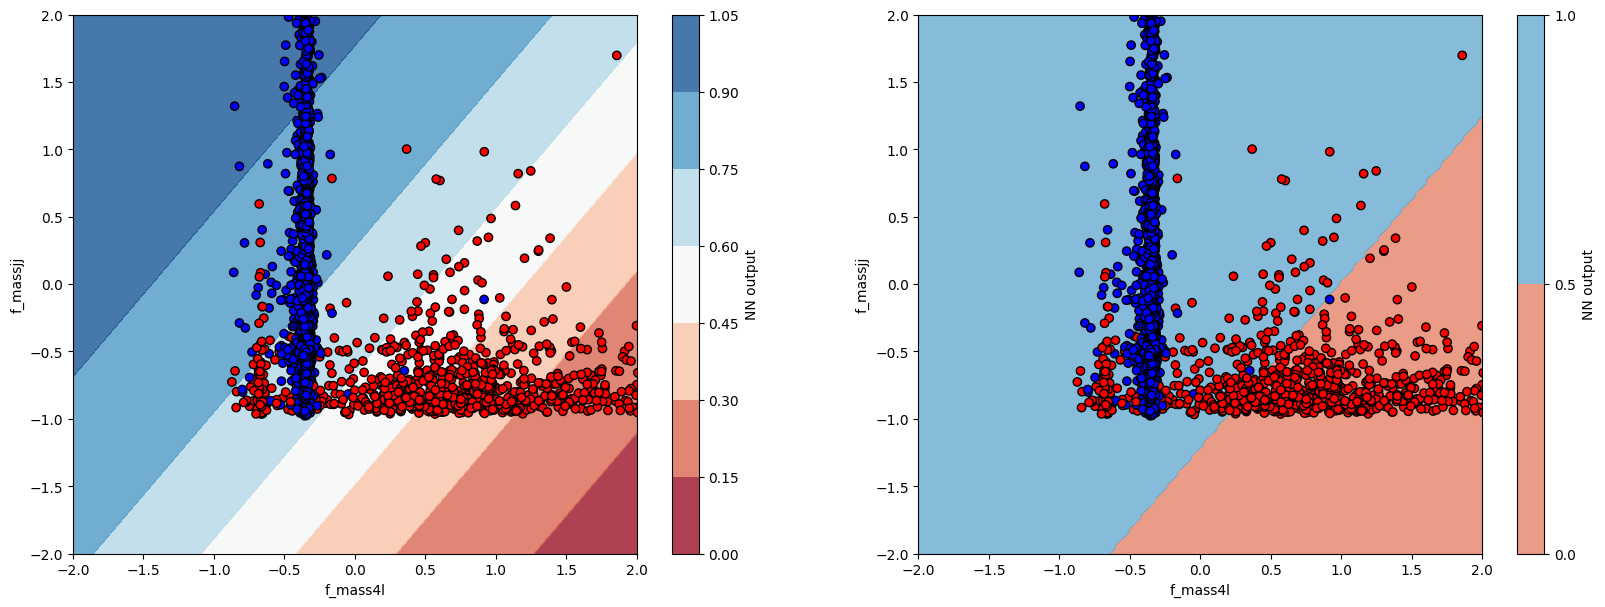

In [19]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(20, 7))

# plot contour map of NN output
# overlaid with test data points
ax = plt.subplot(1, 2, 1)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
cont_plot = ax.contourf(myXI, myYI, myZI, cmap=cm, alpha=0.8)
ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_bright, edgecolors="k")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel(VARS[0])
ax.set_ylabel(VARS[1])
plt.colorbar(cont_plot, ax=ax, boundaries=[0, 1], label="NN output")

# plot decision boundary
# overlaid with test data points
ax = plt.subplot(1, 2, 2)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
cont_plot = ax.contourf(myXI, myYI, myZI > 0.5, cmap=cm, alpha=0.8)
ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_bright, edgecolors="k")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel(VARS[0])
ax.set_ylabel(VARS[1])
plt.colorbar(cont_plot, ax=ax, boundaries=[0, 1], label="NN output")
plt.show()